In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install indic-nlp-library

In [ ]:
import pandas as pd
import re
import random
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Bengali/Bengali.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,Post,Labels Set,Category,Dataset
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,Bengali hate speech
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,Bengali hate speech
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,Bengali hate speech
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,Bengali hate speech
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,Bengali hate speech


<ipython-input-113-168ab42a48df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Labels Set', y='Category', inner='box', palette='Dark2')


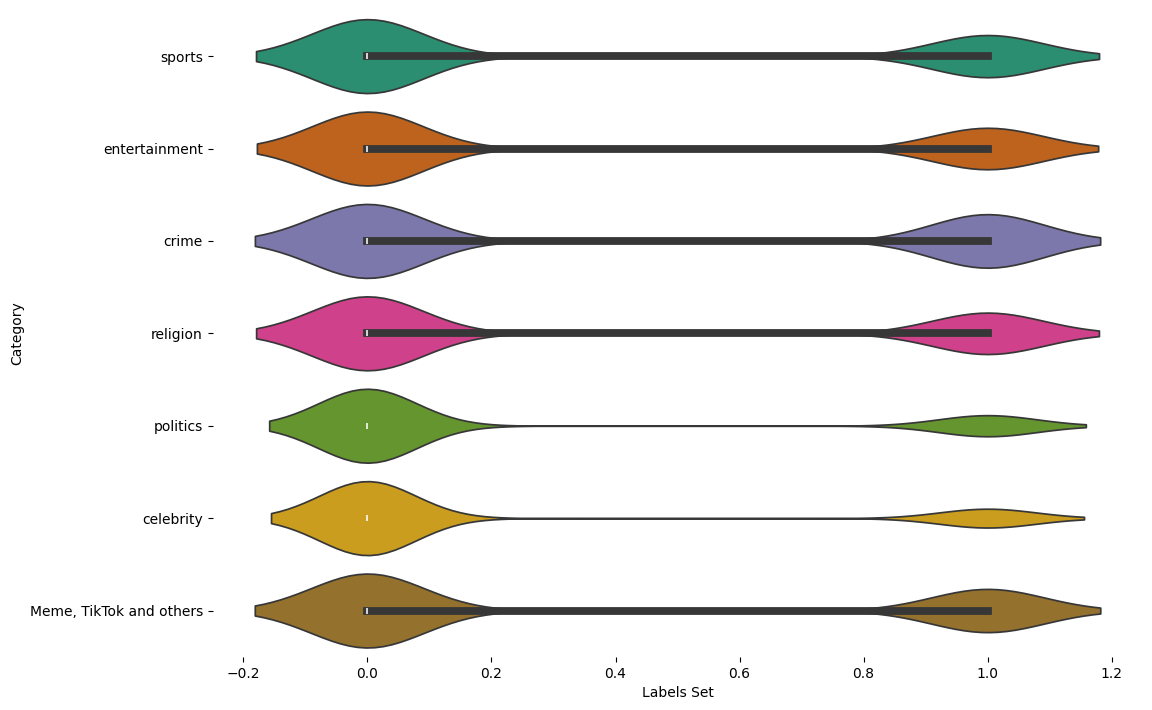

In [ ]:
# @title Category vs Labels Set

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Labels Set', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

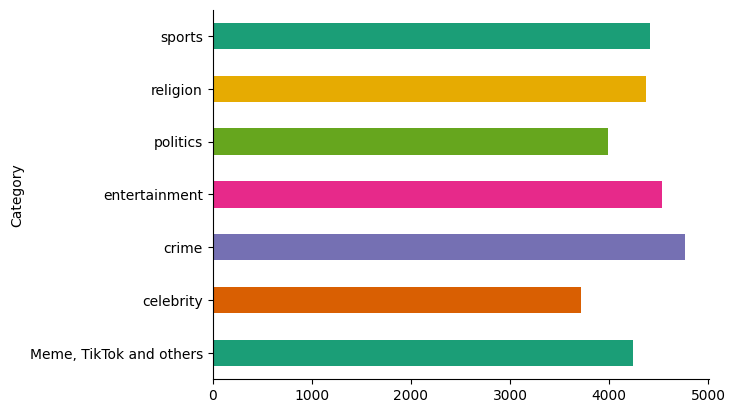

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

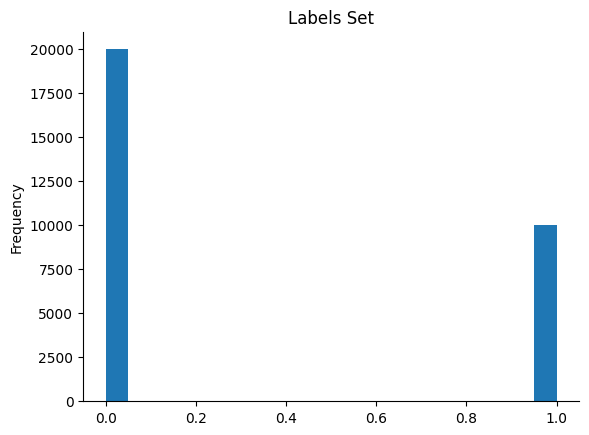

In [ ]:
# @title Labels Set

from matplotlib import pyplot as plt
df['Labels Set'].plot(kind='hist', bins=20, title='Labels Set')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# # Remove rows with 'FAKE' label
# df = df[df['Labels Set'] != 'fake']

# #Print length of the dataset
# print("Length of the dataset: ", len(df))

In [ ]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Duplicate rows found. Removing duplicates...
Length of the dataset after cleaning:  29946


In [ ]:
df.head()

,Post,Labels Set,Category,Dataset
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,Bengali hate speech
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,Bengali hate speech
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,Bengali hate speech
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,Bengali hate speech
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,Bengali hate speech


In [ ]:
import re

def remove_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    # Remove emojis from the text using the pattern
    return emoji_pattern.sub(r'', text)

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Remove mentions, email addresses, URLs, RT (retweet)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s*@\S+', '', text)  # Remove retweets
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation marks (comma and purnviram)
    text = re.sub(r'[\u002C\u0964]', '', text)
    # Remove special characters and accented characters
    #text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

In [ ]:
preprocess_text("যত্তসব পাপন শালার ফাজলামী!!!!!")

'যত্তসব পাপন শালার ফাজলামী!!!!!'

In [ ]:
# Preprocess the 'Post' column
df['Processed_Post'] = df['Post'].apply(preprocess_text)
df['Processed_Post'] = df['Processed_Post'].apply(remove_emojis)

df.head(10)

,Post,Labels Set,Category,Dataset,Processed_Post
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports,Bengali hate speech,যত্তসব পাপন শালার ফাজলামী!!!!!
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports,Bengali hate speech,পাপন শালা রে রিমান্ডে নেওয়া দরকার
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports,Bengali hate speech,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports,Bengali hate speech,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports,Bengali hate speech,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব
5,এটা কুন দরনের কেলা ফাইজলামি তাস্কিন রে চর মারা...,1,sports,Bengali hate speech,এটা কুন দরনের কেলা ফাইজলামি তাস্কিন রে চর মারা...
6,পাপন ভর মাদা চোদ পাপনে পদতেক চাই,1,sports,Bengali hate speech,পাপন ভর মাদা চোদ পাপনে পদতেক চাই
7,দুরো সালার পুদ চুপথাক,1,sports,Bengali hate speech,দুরো সালার পুদ চুপথাক
8,কুত্তার বাছচা পাপন,1,sports,Bengali hate speech,কুত্তার বাছচা পাপন
9,বাল ছাল তর সাউয়া😡,1,sports,Bengali hate speech,বাল ছাল তর সাউয়া


## Code to save the files

In [ ]:
train_hate_df = df[df["Labels Set"] == 1].copy()
train_non_hate_df = df[df["Labels Set"] == 0].copy()

sampled_hate_df = train_hate_df.sample(n=2500, random_state=42)
sampled_non_hate_df = train_non_hate_df.sample(n=2500, random_state=42)

train_sampled_hate_df = sampled_hate_df.iloc[:2000]
train_sampled_non_hate_df = sampled_non_hate_df.iloc[:2000]

train_concatenated_df = pd.concat([train_sampled_hate_df, train_sampled_non_hate_df], axis=0)
train_df = train_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_sampled_hate_df = sampled_hate_df.iloc[-500:]
test_sampled_non_hate_df = sampled_non_hate_df.iloc[-500:]

test_concatenated_df = pd.concat([test_sampled_hate_df, test_sampled_non_hate_df], axis=0)
test_df = test_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [ ]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')